In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [3]:
fs, snd = wavfile.read('output.wav')

In [4]:
snd = snd / (2.**15)
s1 =snd[:,0]

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ]), <a list of 10 Text yticklabel objects>)

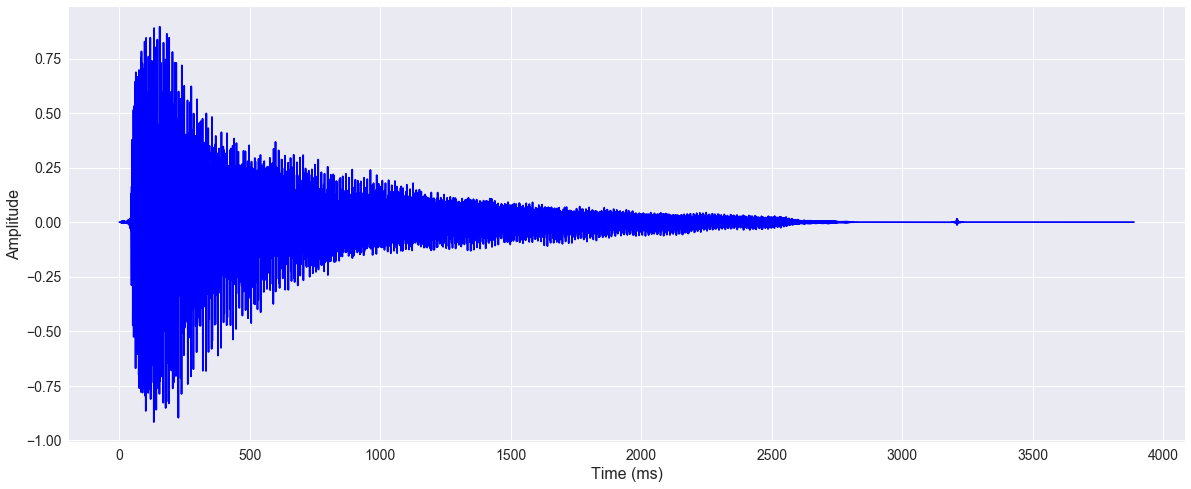

In [5]:
plt.figure(figsize=(20,8))
plt.style.use("seaborn")

time = np.arange(0, s1.shape[0],1)
time = (time / fs) * 1000

plt.plot(time,s1,color='b')
plt.ylabel('Amplitude',fontsize=16)
plt.xlabel('Time (ms)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)



#plt.show()

[329. 330. 415. 555.]


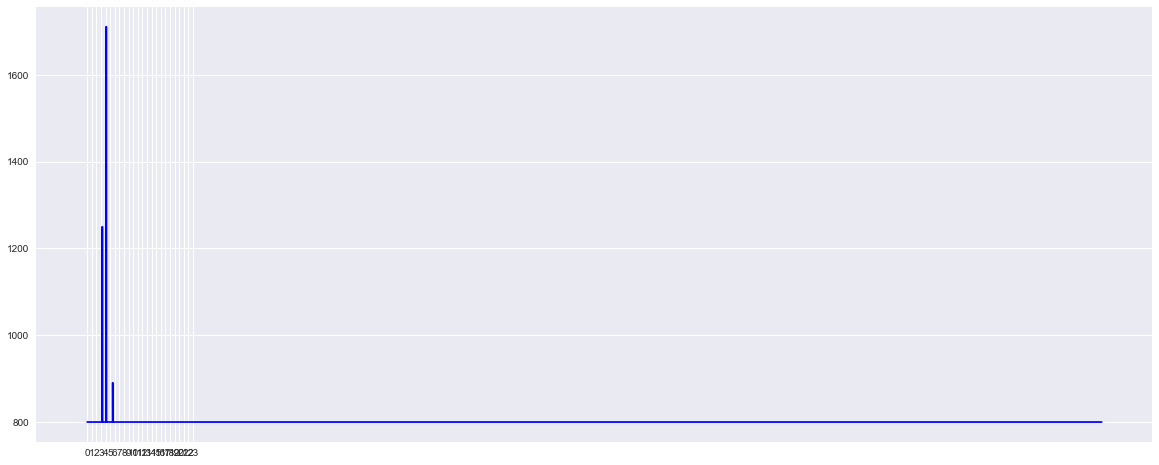

In [6]:

import math
from numpy.fft import fft

plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

plt.style.use("seaborn")

threshold = 800
fs,snd = wavfile.read('output.wav')
y = snd[:,0]


plt.figure(figsize=(20,8))

n = len(y)
p = fft(y)

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2/ n

mag = mag[0:math.ceil(n/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

if threshold != 0:
    print(np.unique(np.rint(freq[np.in1d(mag,mag[mag>threshold])])))
    mag[mag<threshold] = threshold

plt.plot(freq/100, mag, color='b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))
plt.show()    




In [9]:
def gen_wave(frequency, amplitude, Time, phaseshift, sr):
    
    t = np.arange(0,Time,Time/sr)
    X = amplitude * np.sin(2 * np.pi * frequency * t + phaseshift)
    
    return t,X

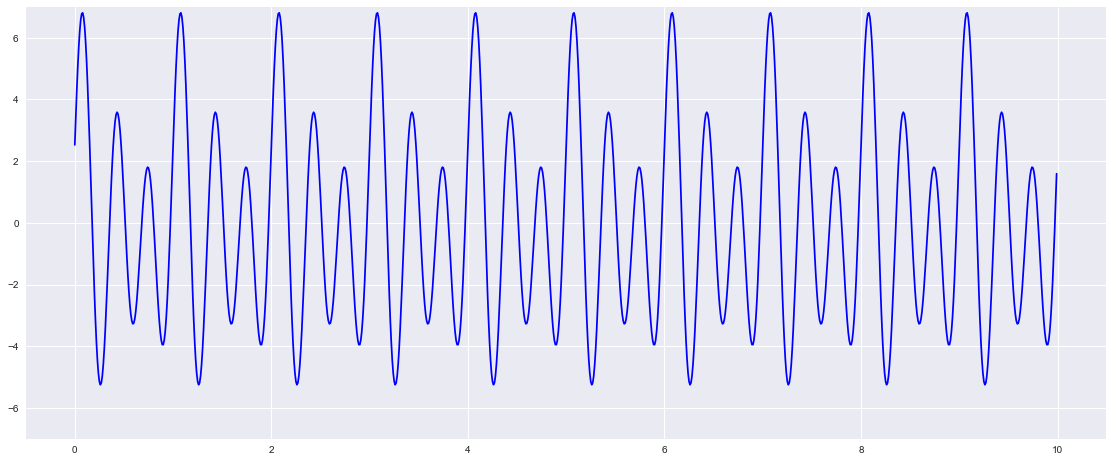

In [22]:
sampleRate = 1000

time, amplitude1 = gen_wave(1, 1, 10, 1, sampleRate)
time, amplitude2 = gen_wave(2, 2, 10, 1, sampleRate)
time, amplitude3 = gen_wave(3, 4, 10, 0, sampleRate)

amplitude = amplitude1 + amplitude2 + amplitude3

fig = plt.figure(figsize=(15,6))

ax = fig.add_axes([0,0,1,1])

ax.set_ylim([-7,7])

ax.plot(time, amplitude, c="b")
plt.grid(True,which='both')

#plt.savefig('complex_signal.png')



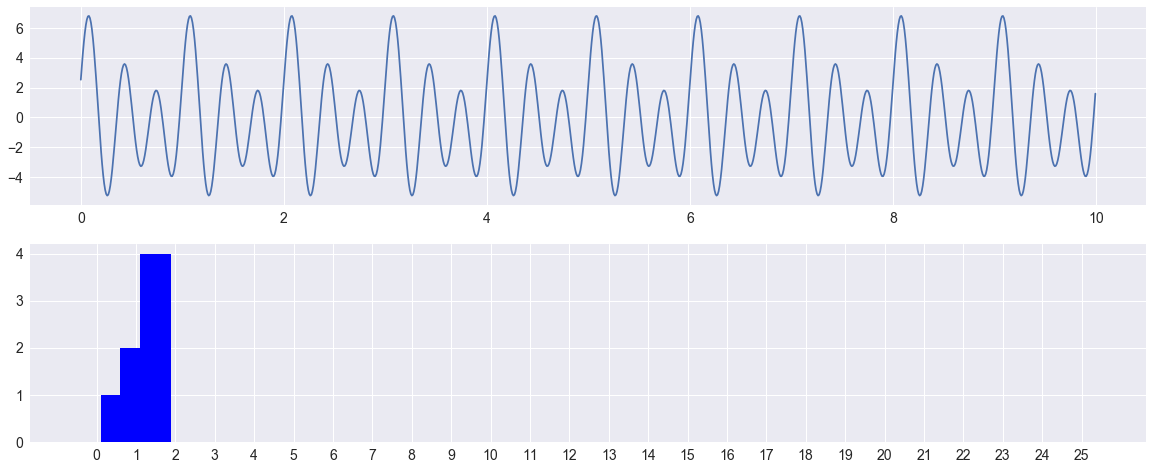

In [39]:

plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50 #in Hz



x,y   = gen_wave(1, 1, 10, 1, 1000)
x,y2   = gen_wave(2, 2, 10, 1, 1000)
x,y3    = gen_wave(3, 4, 10, 0, 1000)

y = y + y2 + y3

axarr[0].plot(time, amplitude)

n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()
f.savefig('complex_signal_decomp.png')